# Regressão Linear

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

In [4]:
print("Tipos de dados:")
print(df.dtypes)

Tipos de dados:
Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object


In [5]:
print("\nDados faltantes por coluna:")
print(df.isnull().sum())


Dados faltantes por coluna:
Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64


In [6]:
# Função describe para análise estatística
print("Estatísticas descritivas dos dados:")
print(df.describe())

Estatísticas descritivas dos dados:
       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%

Com base nos limites calculados e os outliers identificados:

Valor_Aluguel:
Limite superior: R$10.888,39
Valor mais alto: R$25.000

Valor_Condominio:
Limite superior: R$2.942
Outlier mais alto: R$9.500

Metragem:
Limite superior: 255,47 m²
Valor máximo: 880 m²

N_Quartos:
Limite superior: 6
Valor máximo: 10 quartos

N_banheiros:
Limite superior: 6
Valor máximo: 8 banheiros

N_Suites e N_Vagas:
Limite superior para vagas: 7,5
Valor máximo: 9 vagas

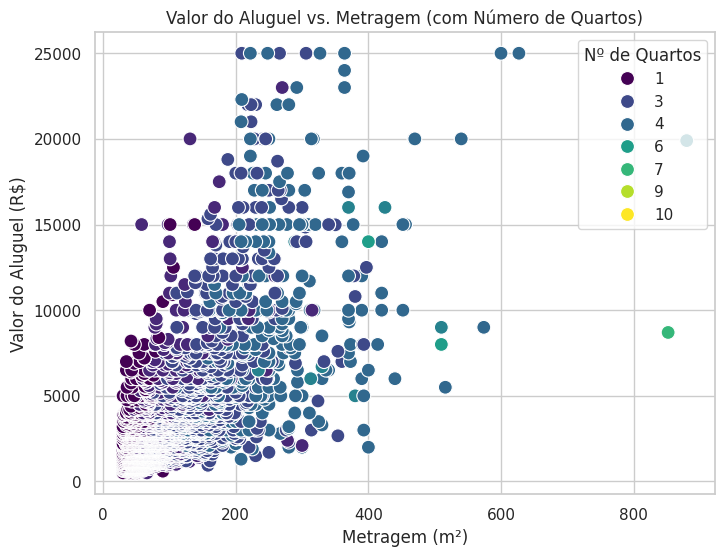

In [7]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid")

# 1. Gráfico de dispersão: Valor do Aluguel vs. Metragem
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Metragem", y="Valor_Aluguel", hue="N_Quartos", palette="viridis", s=100)
plt.title("Valor do Aluguel vs. Metragem (com Número de Quartos)")
plt.xlabel("Metragem (m²)")
plt.ylabel("Valor do Aluguel (R$)")
plt.legend(title="Nº de Quartos")
plt.show()

<ipython-input-8-6f19c58f11d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="N_banheiros", y="Valor_Aluguel", palette="coolwarm")


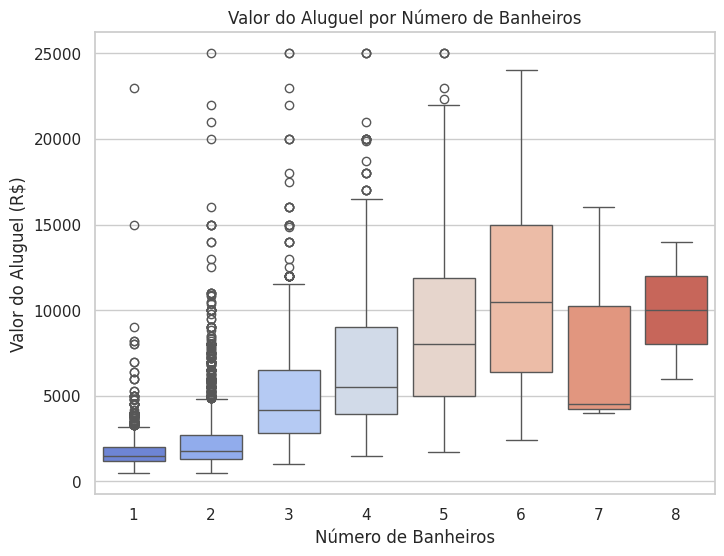

In [8]:
# 2. Boxplot: Valor do Aluguel por Número de Banheiros
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="N_banheiros", y="Valor_Aluguel", palette="coolwarm")
plt.title("Valor do Aluguel por Número de Banheiros")
plt.xlabel("Número de Banheiros")
plt.ylabel("Valor do Aluguel (R$)")
plt.show()


<ipython-input-9-08259ff5ff47>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rent_vagas, x="N_Vagas", y="Valor_Aluguel", palette="Blues_d")


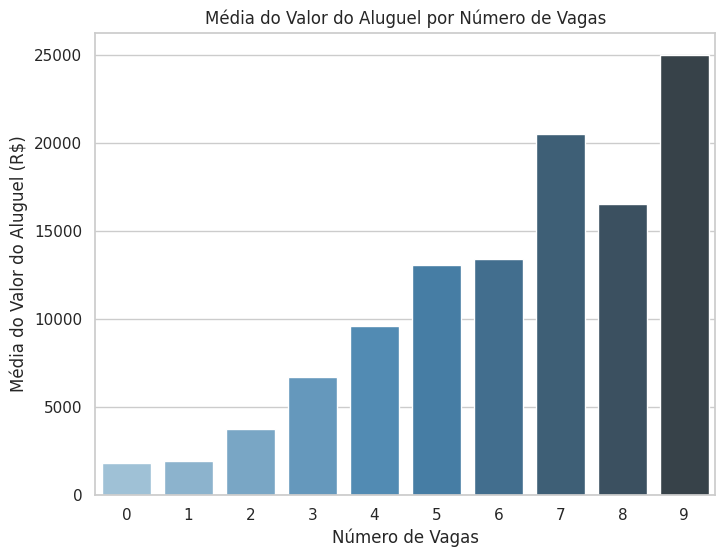

In [9]:
# 3. Gráfico de barras: Média do Valor do Aluguel por Número de Vagas
mean_rent_vagas = df.groupby("N_Vagas")["Valor_Aluguel"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_rent_vagas, x="N_Vagas", y="Valor_Aluguel", palette="Blues_d")
plt.title("Média do Valor do Aluguel por Número de Vagas")
plt.xlabel("Número de Vagas")
plt.ylabel("Média do Valor do Aluguel (R$)")
plt.show()

In [10]:
# Tratando outliers usando o método IQR
def tratar_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # Primeiro quartil
    Q3 = df[col].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Criar uma cópia do DataFrame para preservar os dados originais
    df_tratado = df.copy()

    # Substituir valores fora dos limites por NaN (considerado como remoção de outliers)
    for i in range(len(df_tratado[col])):
        if df_tratado[col][i] < limite_inferior or df_tratado[col][i] > limite_superior:
            df_tratado[col][i] = np.nan

    return df_tratado


In [13]:
# Tratamento de outliers para cada coluna
for coluna in df.columns:
    df = tratar_outliers(df, coluna)

# Exibir DataFrame após o tratamento
print(df)

<ipython-input-10-644c63ff22e4>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tratado[col][i] = np.nan
<ipython-input-10-644c63ff22e4>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting val

      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0             480.0             295.0      48.0        2.0          2.0   
1             500.0               0.0      50.0        1.0          2.0   
2             500.0               0.0      40.0        1.0          2.0   
3             500.0              36.0      45.0        1.0          2.0   
4             500.0               0.0      30.0        1.0          NaN   
...             ...               ...       ...        ...          ...   
7198            NaN               NaN       NaN        4.0          NaN   
7199            NaN               NaN       NaN        4.0          2.0   
7200            NaN               NaN       NaN        3.0          NaN   
7201            NaN               NaN       NaN        4.0          NaN   
7202            NaN            1587.0       NaN        4.0          NaN   

      N_Suites  N_Vagas  
0          1.0      1.0  
1          1.0      1.0  
2          1.0      1

<ipython-input-10-644c63ff22e4>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tratado[col][i] = np.nan
<ipython-input-10-644c63ff22e4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

#Insights dos outliers

Os valores de aluguel e condomínio muito altos foram substituídos por NaN (como valores acima de R$25.000 e R$9.500.

Alguns imóveis possuem valor de condomínio zero, o que pode indicar falta de informação ou imóveis sem taxa de condomínio (talvez terrenos ou imóveis em áreas específicas)

Distribuição do Valor_Aluguel: O valor do aluguel está concentrado em torno de valores mais baixos, o que pode ser típico de imóveis menores ou mais comuns no mercado.

Outliers de metragem: Com a remoção de outliers, vimos que imóveis extremamente grandes (acima de 880m²) foram removidos. Agora a metragem está mais concentrada em torno de 40-100 m², o que parece mais realista para a maioria dos imóveis.

Valores ausentes: O número de quartos e banheiros não apresenta muitos valores ausentes, mas o número de vagas possui algumas lacunas, o que pode ser devido a imóveis sem vaga de garagem



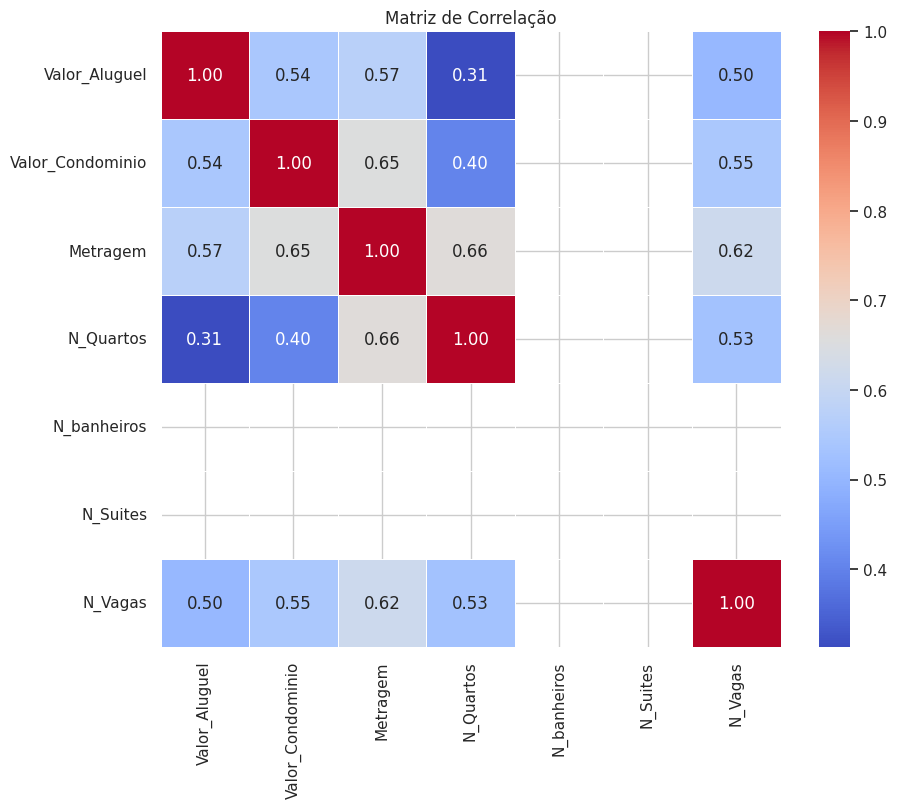

In [14]:
# Matriz de correlação
correlacao = df.corr()

# Plotando
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [16]:
# Substituição de NaN (exemplo: substituindo por média)
df.fillna(df.mean(), inplace=True)

In [17]:
print(df)

      Valor_Aluguel  Valor_Condominio   Metragem  N_Quartos  N_banheiros  \
0        480.000000        295.000000  48.000000        2.0          2.0   
1        500.000000          0.000000  50.000000        1.0          2.0   
2        500.000000          0.000000  40.000000        1.0          2.0   
3        500.000000         36.000000  45.000000        1.0          2.0   
4        500.000000          0.000000  30.000000        1.0          2.0   
...             ...               ...        ...        ...          ...   
7198    2150.560892        628.429953  73.320165        4.0          2.0   
7199    2150.560892        628.429953  73.320165        4.0          2.0   
7200    2150.560892        628.429953  73.320165        3.0          2.0   
7201    2150.560892        628.429953  73.320165        4.0          2.0   
7202    2150.560892       1587.000000  73.320165        4.0          2.0   

      N_Suites   N_Vagas  
0          1.0  1.000000  
1          1.0  1.000000  
2     

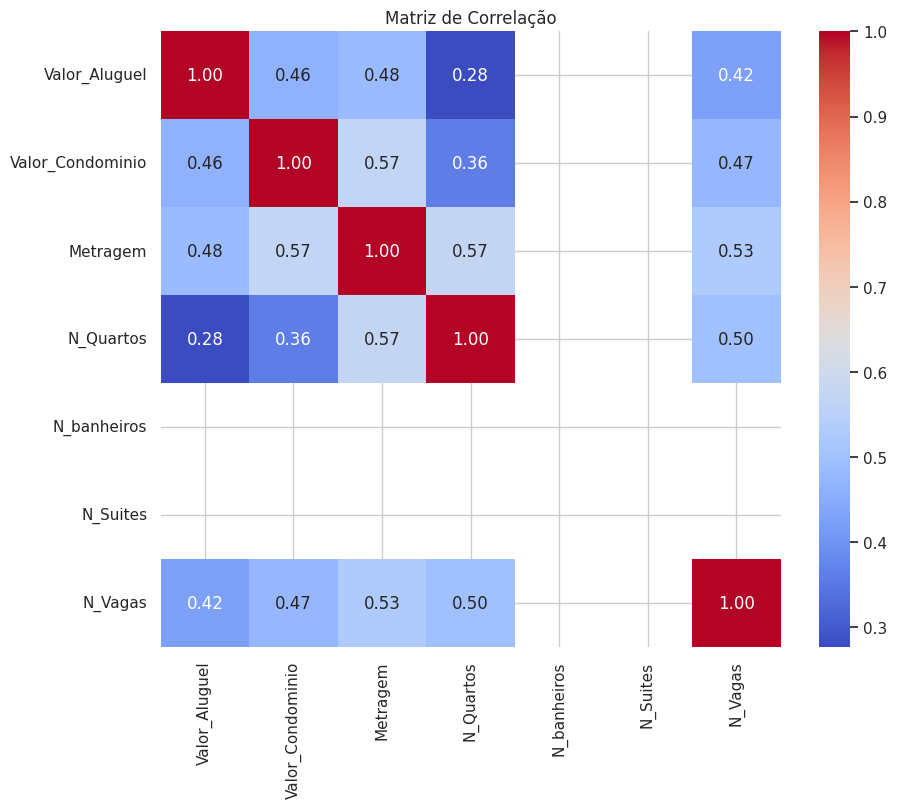

In [18]:
# 2. Calculando a correlação
correlation_matrix = df.corr()

#Plotando a matriz de correlação com Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matriz de Correlação")
plt.show()

In [19]:
#Identificando as variáveis mais fortes correlacionadas com Valor_Aluguel
strongest_correlation = correlation_matrix['Valor_Aluguel'].sort_values(ascending=False)
print("Variáveis mais fortes com 'Valor_Aluguel':")
print(strongest_correlation)

Variáveis mais fortes com 'Valor_Aluguel':
Valor_Aluguel       1.000000
Metragem            0.484191
Valor_Condominio    0.462023
N_Vagas             0.424940
N_Quartos           0.275888
N_banheiros              NaN
N_Suites                 NaN
Name: Valor_Aluguel, dtype: float64


#Insights

Valor do aluguel tende a ser mais alto devido ao valor do condominio e a metragem. Entao imoveis maiores e com condominio mais caro tendem a ter alugueis mais altos.

Valor do condominio está bem relacionado ao numero de vagas e a metragem

Imoveis maiores tem mais quartos

Imoveis maiores e com mais vagas tendem a ter mais vagas de garagem

In [34]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {x_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {x_test.shape[0]}")

Tamanho do conjunto de treino: 5762
Tamanho do conjunto de teste: 1441


In [24]:
X = x_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [26]:
modelo = LinearRegression()

# 4. Treinando o modelo com os dados de treinamento
modelo.fit(x_train, c)

# 5. Fazendo previsões
y_pred = modelo.predict(x_test)

# 6. Avaliando o modelo (exibindo os coeficientes e o intercepto)
print(f'Coeficiente (Inclinação): {modelo.coef_[0]}')
print(f'Intercepto: {modelo.intercept_}')

Coeficiente (Inclinação): 0.5992503587289625
Intercepto: 831.124639806882


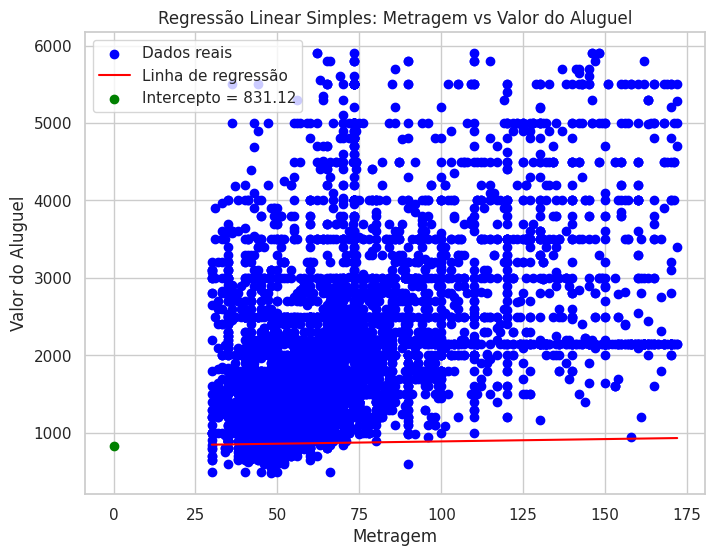

In [31]:
# Gerar os valores de previsão para todas as metragem do conjunto de treino
X_range = np.linspace(x_train['Metragem'].min(), x_train['Metragem'].max(), 100)  # Valores de Metragem para a linha
y_range = modelo.coef_[0] * X_range + modelo.intercept_  # Fórmula da reta (Valor_Aluguel = coef * Metragem + intercepto)

# 2. Plotando o gráfico
plt.figure(figsize=(8, 6))

# Dados reais (acessando apenas a coluna 'Metragem' em X_train)
plt.scatter(x_train['Metragem'], y_train, color='blue', label='Dados reais')

# Linha de regressão
plt.plot(X_range, y_range, color='red', label='Linha de regressão')

# Marcando o intercepto
plt.scatter(0, modelo.intercept_, color='green', zorder=5, label=f'Intercepto = {modelo.intercept_:.2f}')

# Customizando o gráfico
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples: Metragem vs Valor do Aluguel')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


In [36]:
# Usando o X_train completo com todas as variáveis, como no treinamento
r2_treino = modelo.score(x_train, y_train)  # Usando o X_train completo

print(f"R² para o modelo de treinamento: {r2_treino:.4f}")

R² para o modelo de treinamento: 0.3067


In [44]:
# Recriar X_train e X_test para usar apenas 'Metragem'
x_train_metragem = x_train[['Metragem']]  # Usando somente a 'Metragem' no treino
x_test_metragem = x_test[['Metragem']]    # Usando somente a 'Metragem' no teste

# Recriar o modelo de regressão linear com apenas a 'Metragem'
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

# Treinando o modelo com apenas 'Metragem'
modelo.fit(x_train_metragem, y_train)

# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(x_test_metragem)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(x_test_metragem, y_test)  # Avaliando o modelo com a base de teste

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)



Coeficiente de Determinação (R²) nos Dados de Teste: 0.253929725266951


O valor de R² indica que o modelo consegue explicar aproximadamente 25,39% da variação nos dados de Valor de Aluguel com base apenas na variável Metragem.Isso sugere que, embora a metragem seja uma variável importante, ela sozinha não captura a complexidade do comportamento dos preços de aluguel

In [46]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 5762
Tamanho do conjunto de teste: 1441


In [47]:
from sklearn.linear_model import LinearRegression

# Inicializando o modelo
modelo_multiplo = LinearRegression()

# Treinando o modelo com os dados de treino
modelo_multiplo.fit(x_train, y_train)

# Coeficientes e Intercepto do modelo
coeficientes = modelo_multiplo.coef_
intercepto = modelo_multiplo.intercept_

# Exibindo o coeficiente (inclinação) e intercepto
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Coeficientes: [   0.59925036   10.24439727 -108.48447939    0.            0.
  331.24850892]
Intercepto: 831.124639806882


In [49]:
# Calcular o R² (Coeficiente de Determinação) para o modelo de teste
r2_teste = modelo_multiplo.score(X_test, y_test)

# Exibir o valor de R²
print(f"R² nos Dados de Teste: {r2_teste:.4f}")


R² nos Dados de Teste: 0.3233


In [50]:
# Verificando os dados de X_train e y_train
print(X_train.head())
print(y_train.head())


      Valor_Condominio  Metragem  N_Quartos  N_banheiros  N_Suites  N_Vagas
5985       1500.000000     155.0        3.0          2.0       1.0      2.0
6697        628.429953     170.0        3.0          2.0       1.0      0.0
2208          0.000000      32.0        1.0          2.0       1.0      1.0
1423        275.000000      65.0        1.0          2.0       1.0      1.0
122         200.000000      56.0        2.0          2.0       1.0      1.0
5985    4200.000000
6697    2150.560892
2208    1500.000000
1423    1250.000000
122      800.000000
Name: Valor_Aluguel, dtype: float64


In [51]:
from sklearn.linear_model import LinearRegression

# Inicializando o modelo
modelo_multiplo = LinearRegression()

# Treinando o modelo com os dados de treino
modelo_multiplo.fit(X_train, y_train)

# Coeficientes e Intercepto do modelo
coeficientes = modelo_multiplo.coef_
intercepto = modelo_multiplo.intercept_

# Exibindo os coeficientes (inclinação) e intercepto
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [   0.59925036   10.24439727 -108.48447939    0.            0.
  331.24850892]
Intercepto: 831.124639806882


Quando utilizamos várias variáveis, o modelo tem mais recursos para aprender e capturar a complexidade dos dados. Portanto, é esperado que o R² do modelo múltiplo seja maior, já que ele leva em consideração mais informações (como número de quartos, banheiros, etc.), e não depende apenas de uma única variável